In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("UpdatedStudentsPerformance.csv") #Reading the CSV file
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [6]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

<Axes: ylabel='math score'>

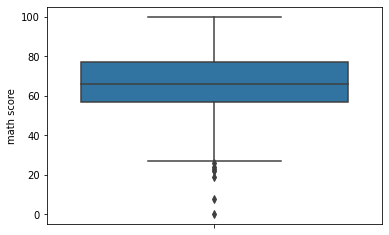

In [13]:
sns.boxplot(y='math score',data=df)  #displays a boxplot

<Axes: ylabel='reading score'>

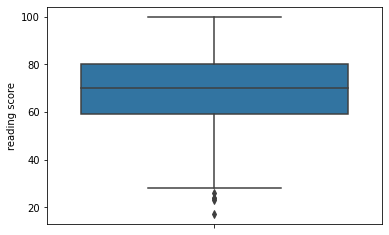

In [14]:
sns.boxplot(y='reading score',data=df)  #displays a boxplot

<Axes: ylabel='writing score'>

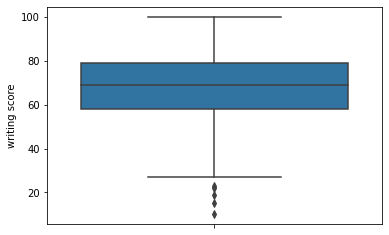

In [15]:
sns.boxplot(y='writing score',data=df)  #displays a boxplot

In [17]:
dfnew=pd.concat([df['math score'],df['reading score'],df['writing score']],axis=1) #concatenation of 
dfnew

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


In [23]:
#method used to remove outliers 
#IQR , Zscore etc
#We are using IQR Inter Quantile Range
Q1=dfnew.quantile(0.25) #25 percent of value
Q3=dfnew.quantile(0.75) #75 percent of value
IQR=Q3-Q1
print(IQR)

math score       20.0
reading score    21.0
writing score    21.0
dtype: float64


In [24]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
print(low)
print(high)

math score       27.0
reading score    27.5
writing score    26.5
dtype: float64
math score       107.0
reading score    111.5
writing score    110.5
dtype: float64


In [26]:
newdf=dfnew[~(((dfnew<low)|(dfnew>high)).any(axis=1))]
newdf

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


<Axes: >

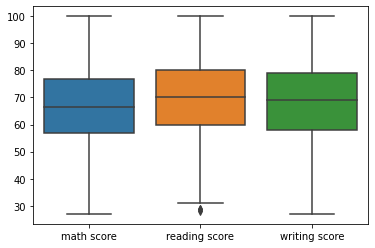

In [27]:
#again checking for outiers
sns.boxplot(data=newdf)

In [28]:
#Normalize it using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
newdf=scaler.fit_transform(newdf)

In [29]:
newdf=pd.DataFrame(newdf,columns=['math','reading','writing'])
newdf

,math,reading,writing
0,0.616438,0.611111,0.643836
1,0.575342,0.861111,0.835616
2,0.863014,0.930556,0.904110
3,0.273973,0.402778,0.232877
4,0.671233,0.694444,0.657534
...,...,...,...
985,0.835616,0.986111,0.931507
986,0.479452,0.375000,0.383562
987,0.438356,0.597222,0.520548
988,0.561644,0.694444,0.684932


In [32]:
#Z Score Normalization

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform Z-score normalization on the encoded DataFrame (final_data)
normalized_data = scaler.fit_transform(newdf)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=newdf.columns)

print(normalized_df.head())


       math   reading   writing
0  0.369373  0.165527  0.370979
1  0.161495  1.439088  1.328899
2  1.616645  1.792855  1.671013
3 -1.362948 -0.895774 -1.681706
4  0.646545  0.590047  0.439402


In [33]:
newdf=pd.DataFrame(newdf,columns=['math','reading','writing'])
newdf

,math,reading,writing
0,0.616438,0.611111,0.643836
1,0.575342,0.861111,0.835616
2,0.863014,0.930556,0.904110
3,0.273973,0.402778,0.232877
4,0.671233,0.694444,0.657534
...,...,...,...
985,0.835616,0.986111,0.931507
986,0.479452,0.375000,0.383562
987,0.438356,0.597222,0.520548
988,0.561644,0.694444,0.684932
